In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dfX = pd.read_csv("Linear_X_Train.csv")
dfY = pd.read_csv("Linear_Y_Train.csv")
dfXtest = pd.read_csv("Linear_X_Test.csv")

x= dfX.values
y = dfY.values
X=x
Y=y

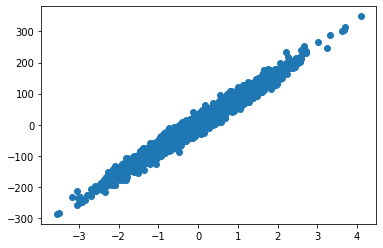

In [3]:
plt.scatter(x,y)
plt.show()

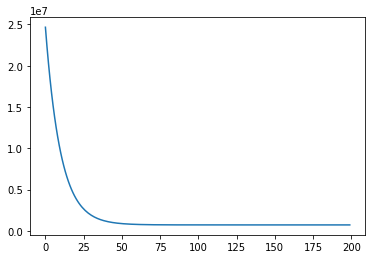

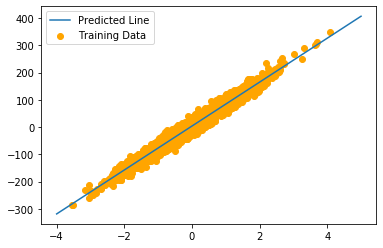

In [4]:
def hypothesis(theta,X):
    return theta[0] + theta[1]*X

def error(theta,X,Y):
    err=0
    m = X.shape[0]
    for i in range(m):
        err += (hypothesis(theta,X[i]) - Y[i])**2
    return err

def summation_hyp(theta,X,Y):
    grad = np.zeros((2,))
    for i in range(X.shape[0]):
        hyp = hypothesis(theta,X[i])
        grad[0]+= hyp-Y[i]
        grad[1]+= (hyp-Y[i])*X[i]
    return grad

def gradient(X,Y):
    theta=np.zeros((2,))
    theta[0]=theta[1]=0
    learning_rate=0.05
    error_list = []
    m=X.shape[0]
    max_itr = 200
    for i in range(max_itr):
        grad = summation_hyp(theta,X,Y)
        er = error(theta,X,Y)
        error_list.append(er)
        
        theta[0]=theta[0] - (learning_rate*grad[0]*(1/m))
        theta[1]=theta[1] - (learning_rate*grad[1]*(1/m))        
    return theta, error_list


final_theta, error=gradient(X,Y)
xtest =np.linspace(-4,5,10)
plt.plot(error)
plt.show()

plt.plot(xtest,hypothesis(final_theta,xtest),label="Predicted Line")
plt.scatter(X,Y,color="orange",label="Training Data")
plt.legend()
plt.show()
    

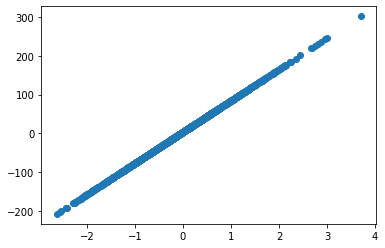

In [5]:
xtest = dfXtest.values
y = []
for i in range(len(xtest)):
    a = final_theta[0] + final_theta[1]*xtest[i]
    y.append(a)

plt.scatter(xtest,y)


In [6]:
y=pd.DataFrame(y,columns=['y'])

In [7]:
y.to_csv("predicted.csv",index=False)

In [8]:
print(final_theta)

[ 3.72660298 80.540042  ]
